# CLASE 29.07

## Metodos para encontrar raices.

El **método de bisección** parte de un intervalo $[a,b]$ donde $f(a)f(b)<0$ y usa la fórmula:

$$
x = \frac{a+b}{2}
$$

Luego se evalúa:

$$
\text{Si } f(a)f(x) < 0 \Rightarrow b = x
$$

$$
\text{Caso contrario } a = x
$$

Esto se repite hasta que $|b-a| < \text{tolerancia}$ o $f(x)=0$.

**Resumido:**

1. Calcular el punto medio: $x = (a+b)/2$.
2. Si $f(a)f(x) < 0$, la raíz está en $[a,x]$ ⇒ $b = x$.
3. Si no, la raíz está en $[x,b]$ ⇒ $a = x$.



### Secante

El método de la **secante** para encontrar raíces de una función $f(x) = 0$ utiliza la fórmula:

$$
x_{k+1} = x_k - f(x_k)\frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}
$$

O también se puede escribir como:

$$
x_{k+1} = \frac{x_{k-1} f(x_k) - x_k f(x_{k-1})}{f(x_k) - f(x_{k-1})}
$$

- Necesitas dos aproximaciones iniciales $x_{k-1}$ y $x_k$. sino 
- A partir de ellas calculas $x_{k+1}$ y sigues iterando hasta cumplir la tolerancia.



El método de **Newton-Raphson** para encontrar raíces de una función $f(x) = 0$ usa la fórmula:

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

---

### ¿Dónde puede dar error?

1. **Si $f'(x_k) = 0$**

   * La fórmula implica una división entre $f'(x_k)$. Si la derivada es cero, el método falla (división por cero).
2. **Si $f'(x_k)$ es muy pequeño**

   * Puede provocar grandes saltos en la aproximación y la iteración puede divergir.
3. **Si la raíz es múltiple**

   * La convergencia es más lenta y puede incluso fallar.
4. **Si la aproximación inicial $x_0$ está lejos de la raíz**

   * El método puede divergir o ir hacia otra raíz.

---


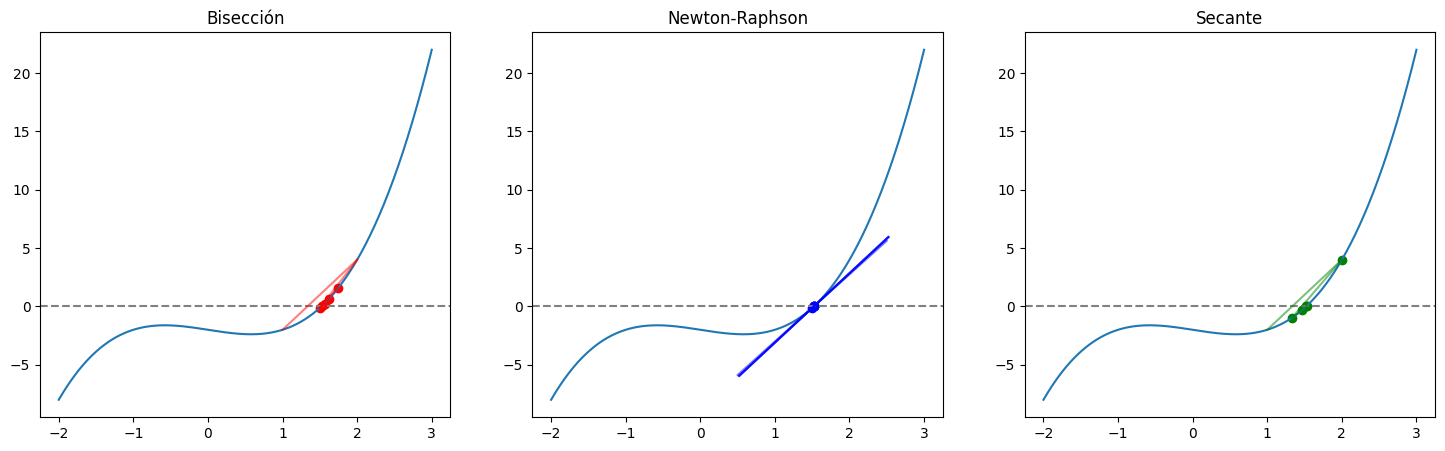

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def metodos_numericos_rectas():
    # Función y su derivada
    def f(x):
        return x**3 - x - 2

    def df(x):
        return 3*x**2 - 1

    # Rango para graficar la función
    x_vals = np.linspace(-2, 3, 400)
    y_vals = f(x_vals)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    titulos = ["Bisección", "Newton-Raphson", "Secante"]

    # ================== MÉTODO DE BISECCIÓN ==================
    a, b = 1, 2
    axs[0].plot(x_vals, y_vals, label="f(x)")
    axs[0].axhline(0, color="gray", linestyle="--")

    for _ in range(5):
        x = (a + b) / 2
        # Recta del intervalo
        axs[0].plot([a, b], [f(a), f(b)], "r-", alpha=0.5)
        axs[0].scatter([x], [f(x)], color="red")
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x

    axs[0].set_title(titulos[0])

    # ================== MÉTODO NEWTON-RAPHSON ==================
    x = 1.5
    axs[1].plot(x_vals, y_vals, label="f(x)")
    axs[1].axhline(0, color="gray", linestyle="--")

    for _ in range(5):
        if df(x) == 0:
            break
        # Puntos y tangente
        y = f(x)
        axs[1].scatter([x], [y], color="blue")
        # Tangente: y = f(x) + f'(x)(X - x)
        X_line = np.linspace(x-1, x+1, 20)
        axs[1].plot(X_line, y + df(x) * (X_line - x), "b-", alpha=0.5)
        x = x - f(x)/df(x)

    axs[1].set_title(titulos[1])

    # ================== MÉTODO DE LA SECANTE ==================
    x0, x1 = 1, 2
    axs[2].plot(x_vals, y_vals, label="f(x)")
    axs[2].axhline(0, color="gray", linestyle="--")

    for _ in range(5):
        axs[2].scatter([x1], [f(x1)], color="green")
        # Dibujar recta secante
        axs[2].plot([x0, x1], [f(x0), f(x1)], "g-", alpha=0.5)
        if f(x1) - f(x0) == 0:
            break
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x2

    axs[2].set_title(titulos[2])

    plt.show()

# Llamar función
metodos_numericos_rectas()




### **Comparación de métodos**

| Método             | Ventajas                                                 | Desventajas        |
| ------------------ | -------------------------------------------------------- | ------------------ |
| **Bisección**      | *(pendiente)*                                            | Convergencia lenta |
| **Newton-Raphson** | Convergencia rápida (cuando $x_0$ está cerca de la raíz) | LLegan a fallar      |
| **Secante**        | Convergencia rápida y no requiere derivada               | LLegan a fallar      |

---


## Desarrollo del cálculo del número de iteraciones en Bisección

1. **Contexto:**
   El método de bisección parte de un intervalo $[a, b]$ donde sabemos que $f(a) \cdot f(b) < 0$, es decir, la raíz está dentro del intervalo. En cada iteración el intervalo se reduce a la mitad.

2. **Longitud del intervalo después de $n$ iteraciones:**
   Al dividir a la mitad el intervalo en cada paso, la longitud del intervalo después de $n$ pasos es:

   $$
   L_n = \frac{b - a}{2^n}
   $$

3. **Precisión deseada:**
   Queremos que la longitud del intervalo sea menor o igual a la precisión deseada $\varepsilon$:

   $$
   L_n \leq \varepsilon
   $$

   Entonces:

   $$
   \frac{b - a}{2^n} \leq \varepsilon
   $$

4. **Despejamos $n$:**

   Multiplicamos ambos lados por $2^n$:

   $$
   b - a \leq \varepsilon \cdot 2^n
   $$

   Dividimos entre $\varepsilon$:

   $$
   \frac{b - a}{\varepsilon} \leq 2^n
   $$

   Tomamos logaritmo base 2 en ambos lados (recordando que $\log_2(2^n) = n$):

   $$
   \log_2 \left( \frac{b - a}{\varepsilon} \right) \leq n
   $$

5. **Interpretación:**
   El número mínimo de iteraciones necesarias para asegurar una precisión $\varepsilon$ es:

   $$
   n \geq \log_2 \left( \frac{b - a}{\varepsilon} \right)
   $$

---

## Resumen:

$$
\boxed{
n = \left\lceil \log_2 \left( \frac{b - a}{\varepsilon} \right) \right\rceil
}
$$

(donde $\lceil \cdot \rceil$ indica que redondeamos hacia arriba porque el número de iteraciones es entero).

---


Claro, aquí te explico por qué y cómo pueden fallar los métodos de **Newton-Raphson** y **Secante** por divergencia o ciclos:

---

## 1. **Newton-Raphson**: causas de fallo

* **Derivada cercana o igual a cero**
  Cuando $f'(x_k)$ es cero o muy pequeño, el paso

  $$
  x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
  $$

  puede dar saltos muy grandes, alejándose de la raíz.

* **Elección mala de $x_0$ (punto inicial)**
  Si el punto inicial está lejos de la raíz real, la iteración puede desviarse o incluso ir hacia otra raíz o infinito.

* **Raíz múltiple o plana**
  Cuando la raíz no es simple, la convergencia se vuelve lenta o errática, incluso puede no converger.

* **Funciones con comportamiento complicado**
  Funciones con múltiples raíces, oscilaciones o singularidades pueden causar que la iteración oscile sin converger (ciclos).

---

## 2. **Método de la Secante**: causas de fallo

* **Diferencia en el denominador cero o cercana a cero**
  En

  $$
  x_{k+1} = x_k - f(x_k) \frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}
  $$

  si $f(x_k) \approx f(x_{k-1})$, la división se hace muy grande o indefinida, causando inestabilidad.

* **Malos puntos iniciales $x_0, x_1$**
  Pueden provocar que la secuencia diverja o entre en ciclos.

* **Funciones no bien comportadas**
  Igual que Newton, funciones con raíces múltiples, oscilaciones o discontinuidades pueden causar ciclos o divergencia.

---

## **¿Qué es un ciclo?**

Un ciclo ocurre cuando la iteración vuelve a un punto anterior y repite un conjunto finito de valores (por ejemplo: $x_3 = x_1$, $x_4 = x_2$, etc.), sin acercarse a la raíz. Es un tipo de **no convergencia**.

---

## Resumen rápido

| Método         | Causas de divergencia o ciclos                                              |
| -------------- | --------------------------------------------------------------------------- |
| Newton-Raphson | Derivada cero o muy pequeña, mal punto inicial, raíz múltiple, oscilaciones |
| Secante        | División por cero (o casi), malos puntos iniciales, función irregular       |

---


### Representacion Vectorial


$$
X = \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2, \quad
F(X) = \begin{pmatrix} f_1(x,y) \\ f_2(x,y) \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$


Vamos a resolver y encontar los ceros , para ello encontramos el jacobiano


$$
J_F(X) =
\begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{pmatrix}
$$



El metodo de nwton para funciones de ese tipo sera el siguiente tenemos que el original funcion le aplicamos la funcion del jabociano


$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

Esto es newton la original . Pero la division por matrices no existe. Asi que vamos a hacer es hacer la multiplicacion de la inversa de  la matriz derivada.

$$
X_{k+1} = X_k - J_F(X_k)^{-1} F(X_k)
$$

Esto ultimo es la ecuacion del **metodo de newton en varias variables**


Y la condicion de paro es 
$$
|x_{k+1} - x_k| < tol
$$

#### Ejemplo 

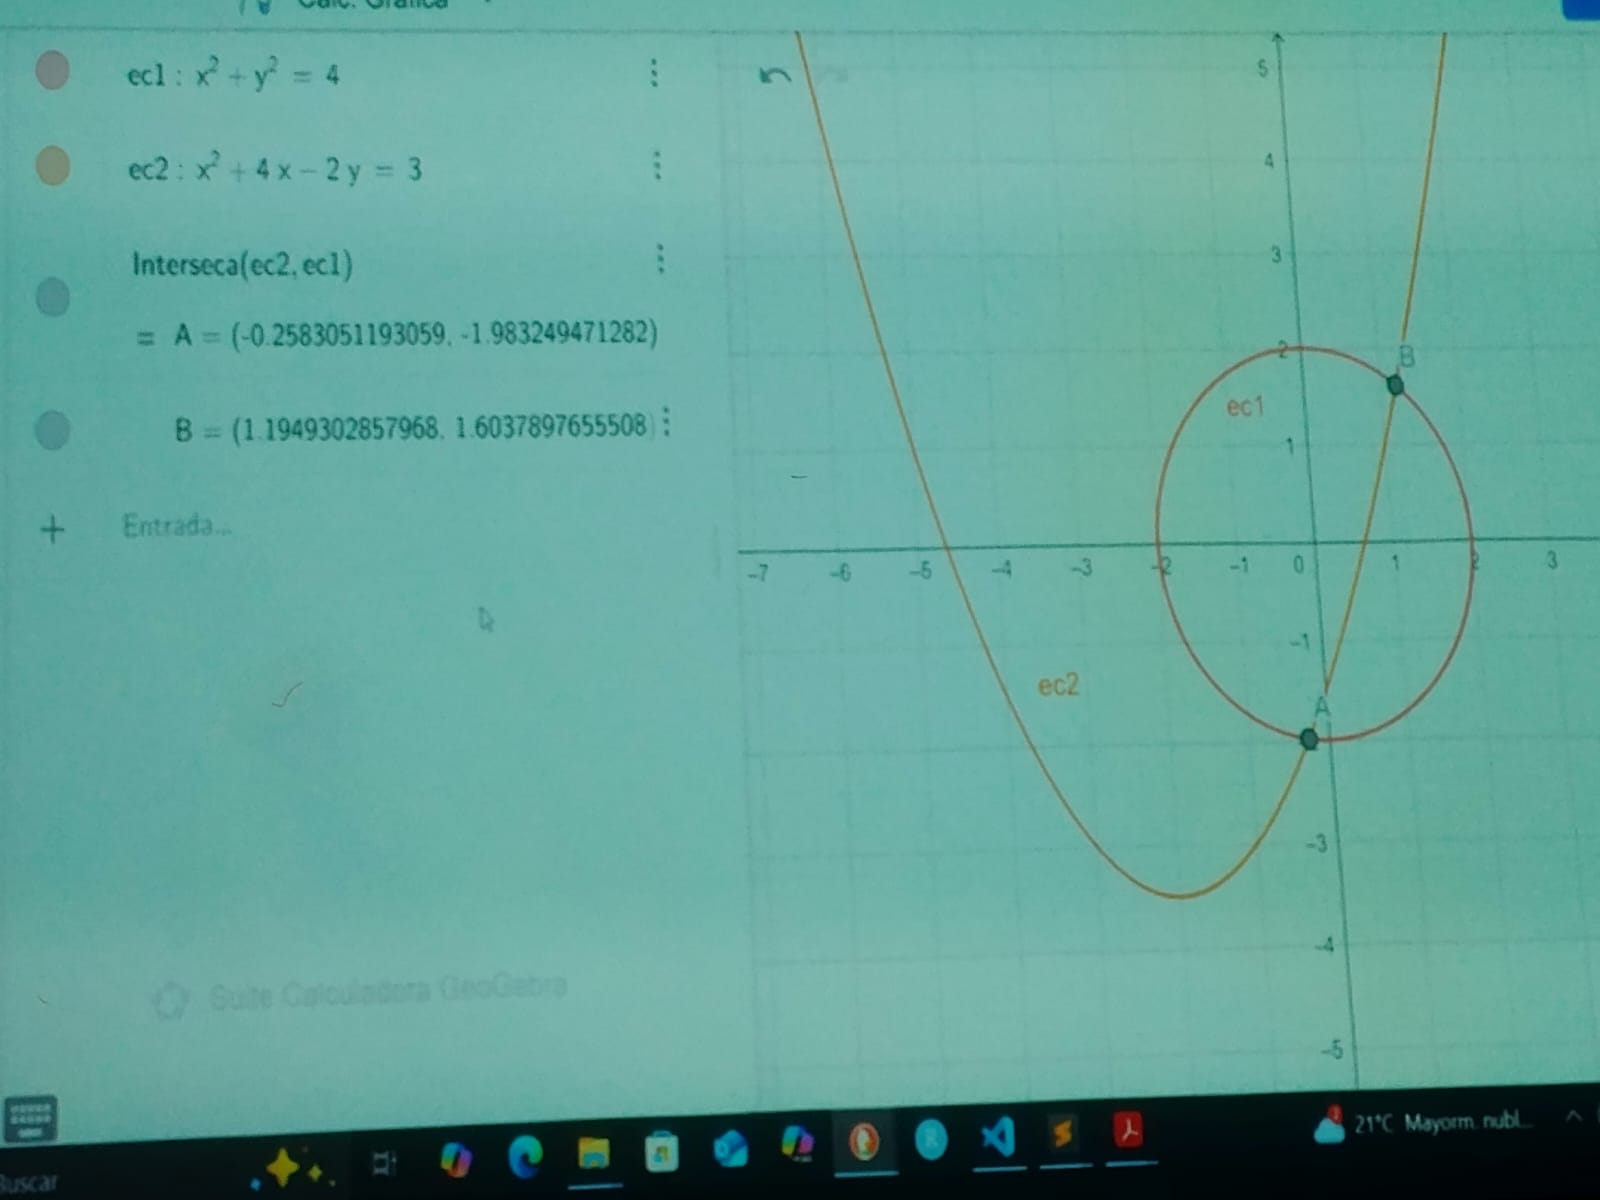

Este usando el codigo de newton extendido para R*n se puede usar para encontrar los interceptos. 

# Clase 31.07


# Fundamentos para la optimización unidimensional (1D)

## Unimodalidad

Una función es **unimodal** si dentro de un intervalo cerrado $[a, b]$ presenta **un único mínimo local**, que en este caso también es mínimo global en ese intervalo. Es decir, si aplicamos un algoritmo de optimización, éste siempre convergerá a ese único mínimo.

> **Unimodal** entonces sabemos que hay un mínimo; entonces si aplico un algoritmo sobre eso va a llegar a un único mínimo posible dentro de un intervalo entre $a$ y $b$.

Sin embargo, una función puede no ser unimodal en todo su dominio:

> Obvio la función completa no es unimodal, pero respecto al único intervalo se vuelve unimodal y se trabaja en otro intervalo. Realmente, el unimodal es en un intervalo.

Además, incluso si la función presenta **picos, saltos o discontinuidades**, puede ser considerada unimodal dentro del intervalo si presenta un solo mínimo:

> Las funciones pueden ser unimodales con picos o saltos, pero esto no le interesa \[al algoritmo], incluso si no es continua. Sino el punto donde hay un mínimo, la función puede ser unimodal.

Esto es clave porque algunos algoritmos de optimización exigen esta propiedad:

> Esto es importante porque el algoritmo a ver pide que sea unimodal, un solo mínimo. El proceso es esbozar la gráfica y darse una idea de dónde está el mínimo para aplicarlo.

### Bimodalidad y multimodalidad

Una función es **bimodal** si presenta **dos mínimos locales distintos**. Se extiende a **multimodal** cuando tiene más de dos mínimos locales.

> **Bimodal:** dos puntos locales
> **Multimodal:** múltiples mínimos o máximos locales

En estos casos, los algoritmos de búsqueda de mínimos pueden **converger a diferentes resultados** dependiendo del punto de inicio o del intervalo seleccionado. Por eso se busca acotar la función a un intervalo donde sea unimodal.

## Algoritmos de optimización 1D

A diferencia de métodos para encontrar ceros de funciones, los algoritmos de optimización 1D buscan **el mínimo** de una función en un intervalo dado.

> En lugar de darme los ceros, me darán el mínimo de la función con un intervalo de trabajo o un punto inicial. Dependiendo del algoritmo puede que pidamos que sea unimodal, diferenciable o que tenga su derivada.

Se estudian métodos que permiten obtener estos mínimos eficientemente, sin calcular derivadas (en algunos casos) ni hacer búsquedas exhaustivas.

## Receta general para métodos de optimización 1D

Para aplicar cualquier método de optimización unidimensional se necesita:

1. **Intervalo o punto inicial:** Indica dónde se buscará el mínimo.
2. **Ecuación de actualización:** Define cómo se generan nuevos puntos.
3. **Criterio de paro:** Por número máximo de iteraciones o tolerancia.

> Esto trata para meter algoritmos de funciones para saber estos mínimos...

## Método de la Razón Áurea (Golden Section Search)

### ¿Por qué "razón áurea"?

> Por ejemplo, $(1 + \sqrt{5}) / 2 \approx 1.618$. Tienen que ver con la proporción áurea, un valor relacionado al Renacimiento, Fibonacci, etc.
> Esto se llama así porque en una parte del algoritmo aparece este número.

### Objetivo

Minimizar una función $f: [a, b] \to \mathbb{R}$, que sea **unimodal** en $[a, b]$.

### Esquema del algoritmo

> Si no lo es \[unimodal], nuestro trabajo es acortar el intervalo donde sí lo sea.

Se parte del intervalo inicial $[a_0, b_0]$ y se escogen dos nuevos puntos:

$$
a_1 = c, \quad b_1 = d
$$

> La condición es que debe haber simetría entre la distancia $a_0 - a_1$ y $b_0 - b_1$, es decir, simétrico en esas distancias.

Estos puntos se colocan usando una proporción $p < \frac{1}{2}$, típicamente:

$$
p = \frac{\sqrt{5} - 1}{2}
$$

De modo que:

$$
c = b - (b - a)\cdot p, \quad d = a + (b - a)\cdot p
$$

Luego:

* Si $f(c) < f(d)$, el mínimo está en $[a, d]$
* Si $f(c) > f(d)$, el mínimo está en $[c, b]$

> Estos dos nuevos puntos lo que me indican es elegir un nuevo lugar de trabajo más pequeño que el original.

### Algoritmo en pseudocódigo

```bash
Algoritmo: (Golden search)
Inputs: [a₀, b₀]: intervalo de búsqueda.
Outputs: x mínimo global de f en [a₀, b₀].

For k = 0, 1, 2, ... hasta que se cumpla criterio de paro:
    cₖ = bₖ − (bₖ − aₖ)(√5−1)/2  
    dₖ = aₖ + (bₖ − aₖ)(√5−1)/2

    xₖ₊₁ = ½(cₖ + dₖ)

    If f(cₖ) < f(dₖ):
        aₖ₊₁ = aₖ, bₖ₊₁ = dₖ
    Else:
        aₖ₊₁ = cₖ, bₖ₊₁ = bₖ

Return xₖ₊₁
```

### Código en Python

(ya lo incluías, no se modifica)

## Interpolación Parabólica

### Motivación

Supongamos una parábola:

$$
f(x) = ax^2 + bx + c
$$

El mínimo de esa parábola (si $a > 0$) está en:

$$
x = -\frac{b}{2a}
$$

> Esto nos sirve para entender el segundo algoritmo "Interpolación parabólica".

### ¿Cómo se construye la parábola?

> Le doy tres puntos: $x_0$, $x_1$, $x_2$ y sus respectivos $y_i = f(x_i)$.
> Entonces construimos una parábola que pase por esos tres puntos.

Una función cuadrática es suficiente para pasar por tres puntos distintos. Si esos puntos son cercanos al mínimo, entonces **la parábola se aproxima a la función** cerca del mínimo real.

### Sistema de ecuaciones lineal

Buscamos los coeficientes $a_k$, $b_k$, $c_k$ de la parábola:

$$
f(x) = a_k x^2 + b_k x + c_k
$$

Dado:

$$
(x_k, f(x_k)), \quad (x_{k+1}, f(x_{k+1})), \quad (x_{k+2}, f(x_{k+2}))
$$

El sistema se representa como:

$$
\begin{pmatrix}
1 & x_k     & x_k^2     \\
1 & x_{k+1} & x_{k+1}^2 \\
1 & x_{k+2} & x_{k+2}^2
\end{pmatrix}
\begin{pmatrix}
c_k \\
b_k \\
a_k
\end{pmatrix}
=
\begin{pmatrix}
f(x_k) \\
f(x_{k+1}) \\
f(x_{k+2})
\end{pmatrix}
$$

### Alternativa: Fórmulas explícitas

> O simplemente se pueden quemar las fórmulas:

$$
\begin{aligned}
c_k &= \frac{(x_{k+1} - x_{k+2})f(x_k) + (x_{k+2} - x_k)f(x_{k+1}) + (x_k - x_{k+1})f(x_{k+2})}
{(x_k - x_{k+1})(x_{k+1} - x_{k+2})(x_{k+2} - x_k)} \\
\\
b_k &= \frac{(x_{k+1}^2 - x_{k+2}^2)f(x_k) + (x_{k+2}^2 - x_k^2)f(x_{k+1}) + (x_k^2 - x_{k+1}^2)f(x_{k+2})}
{(x_k - x_{k+1})(x_{k+1} - x_{k+2})(x_{k+2} - x_k)} \\
\\
a_k &= \frac{(x_{k+1}x_{k+2}^2 - x_{k+2}x_{k+1}^2)f(x_k) + (x_{k+2}x_k^2 - x_kx_{k+2}^2)f(x_{k+1}) + (x_kx_{k+1}^2 - x_{k+1}x_k^2)f(x_{k+2})}
{(x_k - x_{k+1})(x_{k+1} - x_{k+2})(x_{k+2} - x_k)}
\end{aligned}
$$

### Validación

Antes de calcular el nuevo $x = -b_k / 2a_k$, es fundamental verificar que:

> $a_k > 0$. Si no, entonces el mínimo no está bien definido (la parábola se abre hacia abajo) → se debe lanzar error o cambiar puntos.

## Método de Newton para Optimización

### Fundamento

> Recordando Newton para ceros:

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

Ahora queremos encontrar el **mínimo** de $f$, lo cual ocurre cuando $f'(x) = 0$. Entonces, buscamos ceros de la derivada:

> Entonces si quiero el mínimo $f'(x) = 0$, es decir, $x$ es mínimo de $f$, se debe cumplir lo anterior.

Aplicamos Newton **a la derivada**:

$$
x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}
$$

Este método converge rápidamente cuando se cumplen las condiciones necesarias, pero:

> Tendremos las mismas desventajas de Newton: derivada igual a cero, ciclos, divergencia, etc.

### Observación

> Sirve también para encontrar **máximos** si el segundo derivado es negativo, pero aquí lo usamos para mínimos.

El resto del código y estructura ya lo habías puesto completo y está bien.

# Clase 0708


## Optimizacion Continua
Problemas de Optimizacion, vamos a pedir siempre que F sea diferencial par apoder calcular las derivadas parciales ,para obtener el $$minf(x)$$.

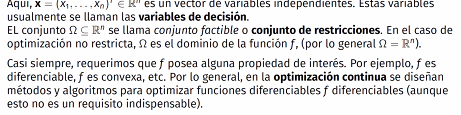

### Ejemplo:


**Ejemplos:**

$\min_{\mathbf{x}} \frac{\mathbf{x}^T A \mathbf{x}}{\mathbf{x}^T \mathbf{x}}$, donde $A \in \mathbb{R}^{n \times n}$ es simétrica.

(cociente de Rayleigh) [En PCA utiliza una funcion donde minimiaza Rayleigh]

---

$\min_{\mathbf{x} \in \mathbb{R}^n} \sum_{i=1}^{n} (x_i - y_i)^2 + \lambda \sum_{i=1}^{n-1} (x_{i+1} - x_i)^2$.

(mínimos cuadrados con regularización de Tychonoff)

---

$\min_{\mathbf{x} \in \mathbb{R}^n} \sum_{i=1}^{n-1} [(x_{i+1} - x_i^2)^2 + (1-x_i)^2]$.

(función de ROSENBROCK).

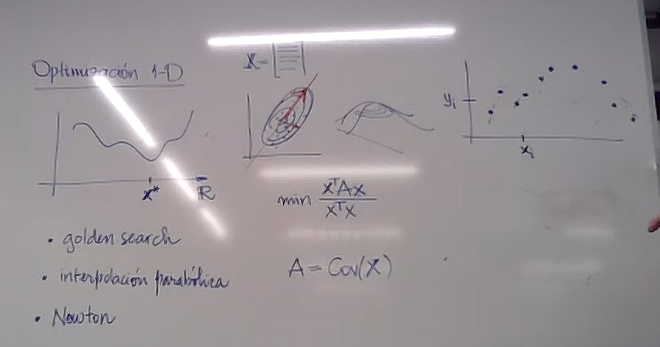


Para evitar el overfitting definimos rosenbrock, que eivta eso mismo. 

El modelo de regresion normal tene las sumas de cuadrados, ese otro termino es el termino de regularizacion  . Para lo que sirve aparte de la primera que es la funcion de error. este nuevo termino para lo que sirve es para obligar a que la curva no tenga tantos cambios

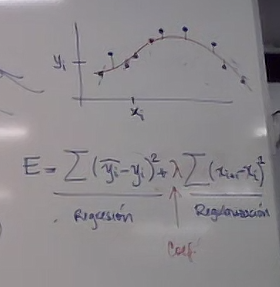

El lambda es muy pequeño , le damos fuerza al error, entonces se encontrara una con muy poco error. Pero cuando sea mas grande, le damos mas regularizacion

Cuando combinamos los 2 obtenemos buenos modelos de regresion



La funcion de test es una funcion que es una funcion complicada de optimizar, entonces cuesta avanzar por la region

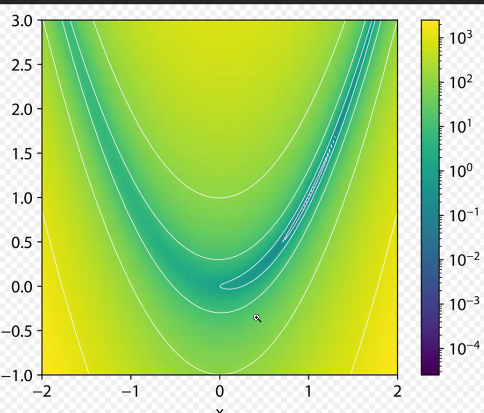

Cuando hay regiones planas, el gradiente avanza 

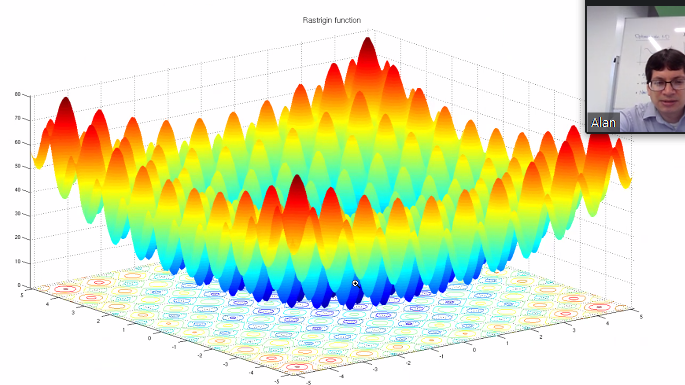

Nos sirve para saber de prueba si los algoritmos de optimizacion no se quedan colgando en minios locales.

El proposiot es que ya se sabe donde es el minimo y tus pruebas deben de acercarse a ese minimo

---

### Gradiente

Para una función diferenciable $f: \Omega \subseteq \mathbb{R}^n \rightarrow \mathbb{R}$, recordemos que el **gradiente** de $f$ en el punto $\mathbf{p} \in \Omega$ es el vector

$$\nabla f(\mathbf{p}) = \left(\frac{\partial f}{\partial x_1}(\mathbf{p}), \frac{\partial f}{\partial x_2}(\mathbf{p}), \dots, \frac{\partial f}{\partial x_n}(\mathbf{p})\right)^T \in \mathbb{R}^n.$$

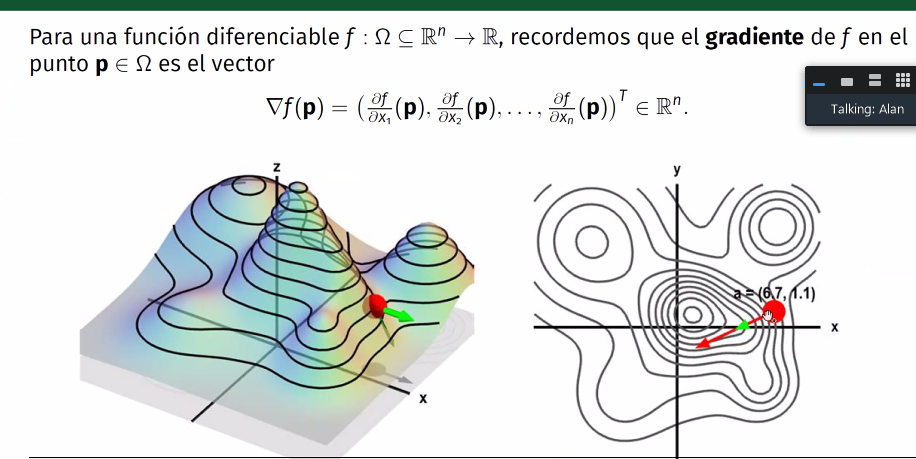

El gradiente es un vector donde la funcion crece mas rapido. El negativo del gradiente apunta hacia donde la funcion decrece mas rapido


Cuando quiero maximizar la funcion me conviene usar la informacion del gradiente. Si quiero minimizar usamos el negativo del gradiente. 



Esto nos dice que si queremos maximizar solo debemos de invertir el valor de positivo a negativo en problemas de minimizacion

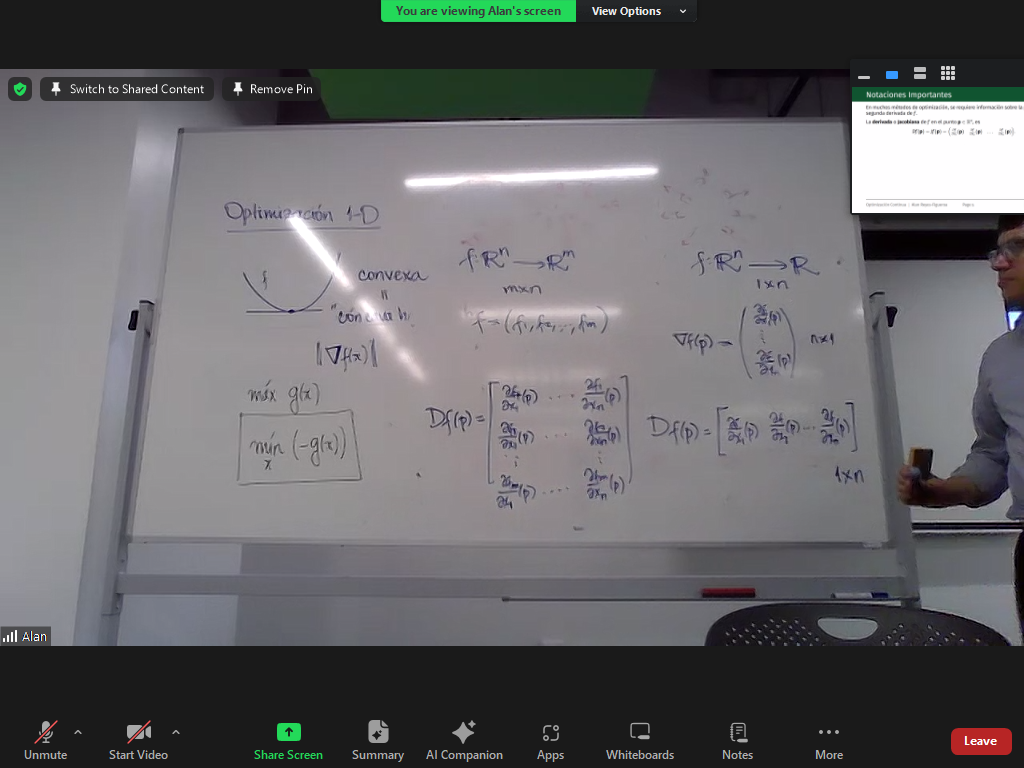

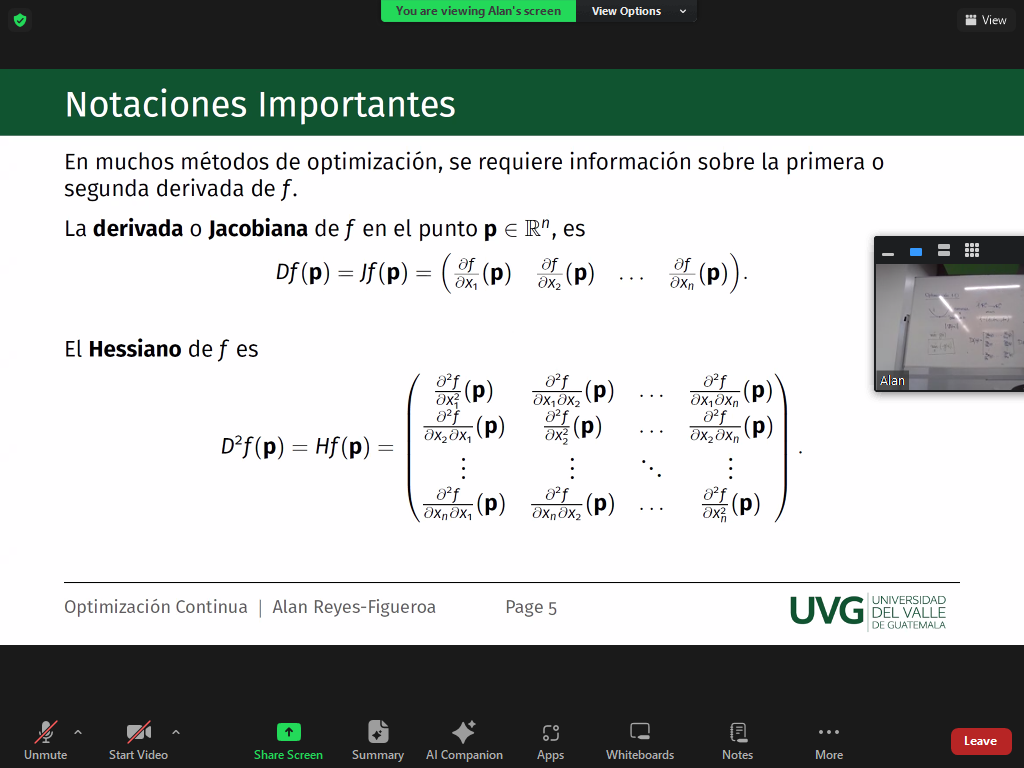

El hessiano es una matriz de nxn van a ir todas las segundas derivadas

El hessiano de una función de varias variables $f(\mathbf{x})$ se define como la matriz cuyas entradas son las segundas derivadas parciales. Si $\mathbf{x} = (x_1, x_2, \dots, x_n)$, el elemento en la fila $i$ y columna $j$ de la matriz hessiana se calcula como:

$$(Hess(f)(\mathbf{x}))_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}$$

La matriz completa tiene la siguiente forma:

$$
\nabla^2 f(\mathbf{x}) = \begin{pmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{pmatrix}
$$

Si las segundas derivadas parciales cruzadas son continuas, entonces la matriz hessiana es simétrica. Esto significa que $\frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}$.

La segunda derivada tiene que ver en como se curva, la primera es en el plano tangente. 

Los eigen valores del hessiano. 

- Eigenvalores todos positivos: La matriz hessiana es definida positiva. Esto significa que la función es cóncava hacia arriba (convexa) en ese punto en todas las direcciones. El punto es un mínimo local. 

- Eigenvalores todos negativos: La matriz hessiana es definida negativa. Esto significa que la función es cóncava hacia abajo en ese punto en todas las direcciones. El punto es un máximo local. 

- Eigenvalores con signos mixtos (algunos positivos y otros negativos): La matriz hessiana es indefinida. La función es cóncava hacia arriba en algunas direcciones y cóncava hacia abajo en otras. El punto es un punto de silla. 

- Eigenvalores iguales a cero: El test es inconcluyente. Se necesita información adicional para determinar la naturaleza del punto crítico.


Minimo la matriz es positiva en un Maximo la matriz es negativa


El problema de los minimos es que hay locales y globales. 

x* minimo local cuando 

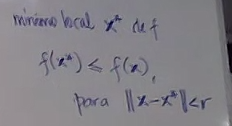

Osea para los puntos a una distancia menor a R del punto y que son mayores a este. Mas afuera no importa que pase

Minimo global es minimo para todo R


Minimo global esctrico es cuando los demas estan sobre este estrictamente mas arriba

Minimo local esctrico es cuando los demas estan sobre este estrictamente mas arriba






## Tipos de Extremos

### Definición

Un punto $\boldsymbol{x}^{*} \in \Omega$ es un **mínimo local aislado** de $f: \Omega \subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$, si $\boldsymbol{x}^{*}$ es mínimo local de $f$ y existe una vecindad $U \subseteq \mathbb{R}^{n}$ de $\boldsymbol{x}^{*}$ tal que $\boldsymbol{x}^{*}$ es el único mínimo local de $f$ en $U$.

## Definición

Un punto $\boldsymbol{x}^{*} \in \Omega$ es un **mínimo local aislado** de $f: \Omega \subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$, si $\boldsymbol{x}^{*}$ es mínimo local de $f$ y existe una vecindad $U \subseteq \mathbb{R}^{n}$ de $\boldsymbol{x}^{*}$ tal que $\boldsymbol{x}^{*}$ es el único mínimo local de $f$ en $U$.

Un punto $\boldsymbol{x}^{*} \in \Omega$ es un **mínimo local no aislado** de $f$, si para toda vecindad $U$ de $\boldsymbol{x}^{*}$, existe $\boldsymbol{x} \in U, \boldsymbol{x} \neq \boldsymbol{x}^{*}$, tal que $\boldsymbol{x}$ también es mínimo local de $f$.

---

## Ejemplo

La función $f: \mathbb{R} \rightarrow \mathbb{R}, f(x) = x^{2} \cos \frac{1}{x} + x^{2}, f(0) = 0$, posee un mínimo local no estricto y no aislado en $x = 0$.

---

## Ejemplo

La función $g: \mathbb{R} \rightarrow \mathbb{R}, g(x) = x^{2} \cos \frac{1}{x} + 2x^{2}, g(0) = 0$, posee un mínimo local estricto y no aislado en $x = 0$.

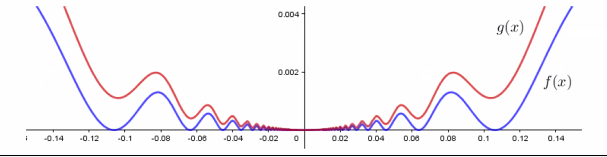

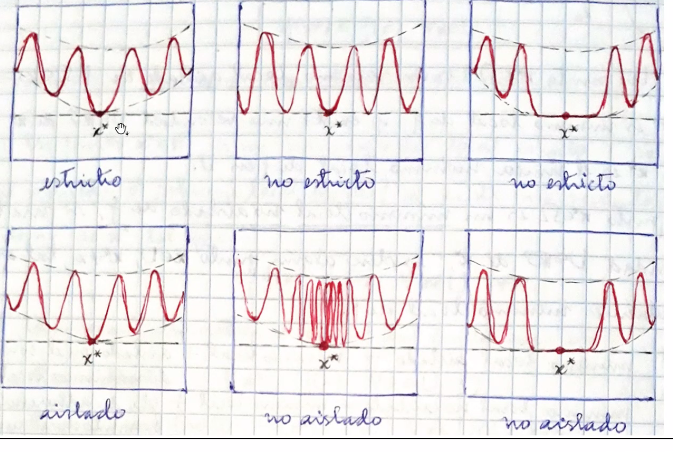

### Dificulates:
- nuestros algoritmos se quedan estancados en min locales
- el optimo global puede estar en una region no explorada
- funciones con muchos minimos
- no diferenciable de punto minimo



# Descenso Gradiente

  El algoritmo usara la informacion del gradiente , para ver a donde se movera, por eso se mueve encontra gradiente 


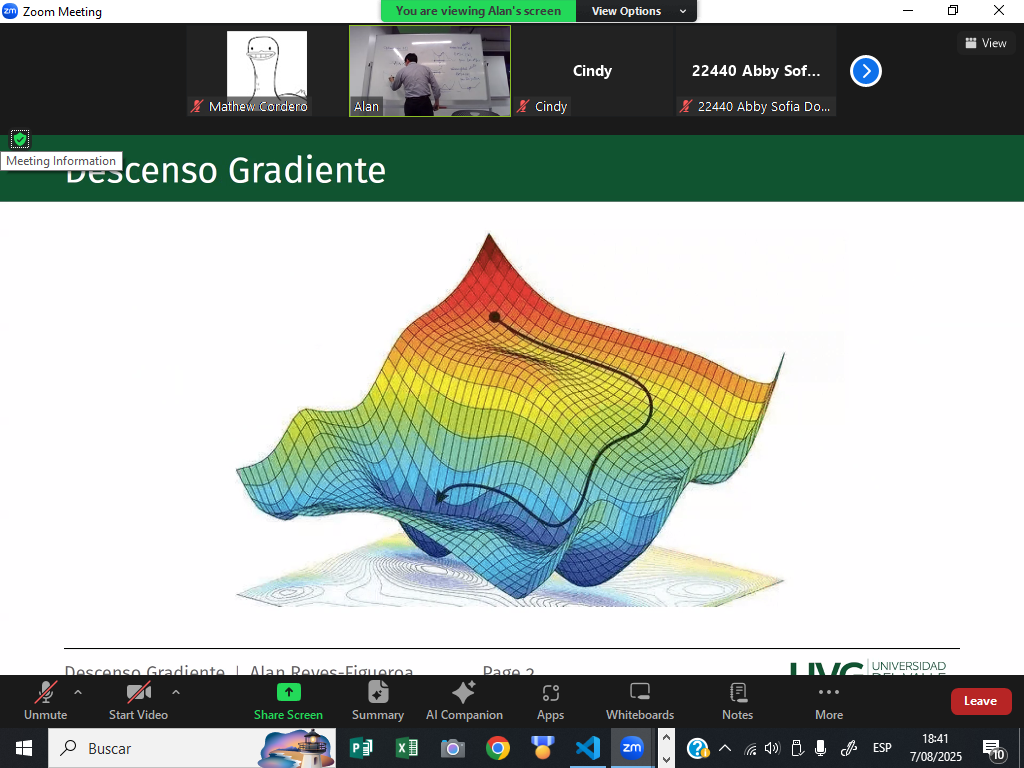


Entonces sabra como empezar, como iterar y como irse moviendo

El objetivo del algoritmo de descenso gradiente es que nos  vamos a mover en esa direccion. Que tanto nos vamos a mover es un numero  $\alpha$  en donde nos vamos a mover. Este numero es un hiperparametro que el usuario mueve a su antojo. 

El negativo del gradiente lo que nos va a llevar a es a la direccion del minimo

Y la ecuacion para calcular el siguiente paso es 


$$
x_{k+1} = x_k - \alpha \, \nabla f(x_k)
$$

donde:

* $x_k$ es el punto actual,
* $\alpha$ es la tasa de aprendizaje (learning rate),
* $\nabla f(x_k)$ es el gradiente en $x_k$.

El **negativo del gradiente** indica la dirección de máximo descenso, por eso lo restamos.


A veces el negativo del gradiente nos lleva a maximos.


Vamos a elegir una direccion para movernos. Lo que andamos buscando es una direccion que cuando nos movamos la funcion decrezca. 



Si uno elige mal un tama;o de paso, uno se puede llegar a quedar estancado, y no legar al minimo que estamos buscando, de hecho es lo que pasa cuando se calibra una red neuronal, no eligen bien el tama;o del peaso, la red no converge o se tarda demasiado o converge a algo que no tiene sentido. 

### Estrategias paraelegir a un alpha


No hay una receta, pero hay practica sencillas para elegir la mejor


Pasos
- Elegir un $\alpha$ cualquiera si funciona o converge no busco
- sino funciona lo que podemos hacer es encontrar un multiplo de alpha. osea $\alpha = p\alpha$  donde $0<p<1$
- sino lo encontramos un multiplo mas pequeño.


Un ejemplo seria algo asi, se calcula del $\alpha$ anterior no del primero que obtuve
- $\alpha_{k + 1} = \frac{1}{2}\alpha_{k} $, $\alpha_{k + 2} = \frac{1}{4}\alpha_{k+1} $, $\alpha_{k + 3} = \frac{1}{8}\alpha_{k+2} $

Entre los algoritmos de descenso gradiente el mejor es descenso maximo, a diferencia de aleatorio y de la estrategia de rotar el gradiente por cada iteracion y eoncontrar siempre el minimo , esto puede ocurrir al tratar de encontrar un valor

### Suma gausiannas. 

Funciones gausianas tienen varios minimos ya que creean varias gausianas en una matriz cuyos centros son los centros de cada gausiana.



Si queremos encontrar diferentes minimos en funcioens como estas, cambiamos el punto inicilal en cada iteracion para poder encontrar ddiferentes minimos. Las estrategias son 

- GRID : Armar una maya de puntos, con una cantidad finita de puntos, y todos esos puntos de grids probarlos. Osea un grid search, osea los puntos de las mayas sirven como puntos iniciales. 

- La otra estrategia es mas aleatoria, es dejar los puntos al azar, le damos una region de bsuqueda donde prueba en dierentes puntos, pero elegimos d emanera aleatoria esos puntos. 


Un problema de los algoritmos, es que no convergen en minimos absolutos sino para buscar minimos locales asi que hay que ir probando en que psocion inicializarlos. 

## Descenso de Cauchy

El **descenso de Cauchy** (también llamado **dirección de Cauchy** o **método del gradiente más pronunciado**) es una técnica usada en optimización para decidir **hacia dónde moverse** cuando buscas minimizar una función.

La idea principal es:

1. **Calcular el gradiente** de la función en el punto actual $x_k$.

   * El gradiente $\nabla f(x_k)$ apunta en la dirección de mayor crecimiento.
2. **Invertir la dirección** ($-\nabla f(x_k)$) para ir hacia donde la función decrece más rápidamente.
3. **Determinar la longitud óptima del paso** $\alpha_k$ que minimiza la función **en esa dirección específica** (búsqueda en línea exacta).
4. Actualizar:

$$
x_{k+1} = x_k - \alpha_k \nabla f(x_k)
$$


En el **descenso de Cauchy** con **búsqueda en línea exacta**:

* En cada iteración **sí** estás resolviendo un problema de optimización 1D: encontrar el $\alpha_k$ que minimiza $f(x_k - \alpha \nabla f(x_k))$.
* Esto puede implicar evaluaciones repetidas de la función e incluso de su gradiente, lo que aumenta el **costo por iteración**.

🔍 **Ventaja**:

* Al ajustar $\alpha_k$ de forma óptima en cada paso, el método puede “aprovechar” zonas donde la función tiene valles amplios (pasos grandes) o estrechos (pasos pequeños).
* Esto suele **reducir el número total de iteraciones** necesarias para alcanzar la tolerancia deseada.
* En casos ideales (funciones cuadráticas), puede llegar al mínimo en un solo paso.

⚖ **Desventaja**:

* El coste por iteración es mayor que usar un $\alpha$ fijo (método de gradiente con paso constante), porque básicamente resuelves una mini-optimización cada vez.
* En problemas grandes, esto puede ser prohibitivo, y por eso muchas veces se usa **búsqueda en línea inexacta** (Wolfe, Armijo, etc.) o pasos fijos adaptativos.

💡 **Resumen de equilibrio**:

* **Costo por iteración alto** ⟶ pero **menos iteraciones totales**.
* **Costo por iteración bajo** (paso fijo) ⟶ pero **más iteraciones** y riesgo de pasos demasiado pequeños o demasiado grandes que empeoran la convergencia.



El **método del gradiente conjugado** es como una “versión turbo” del descenso de Cauchy, diseñado sobre todo para problemas **cuadráticos** grandes y simétricos definidos positivos (como los que aparecen al resolver sistemas lineales $Ax = b$).

### 📌 Idea básica

El problema de minimizar

$$
f(x) = \frac{1}{2}x^T A x - b^T x
$$

tiene solución exacta en $x^* = A^{-1} b$.
En lugar de hacer descenso de Cauchy (que avanza en la dirección $-\nabla f$ y puede zigzaguear), el gradiente conjugado:

1. Calcula la **dirección de descenso inicial** como el gradiente negativo.
2. Después **corrige la dirección** en cada paso para que sea **conjugada respecto a $A$**, es decir:

   $$
   p_i^T A p_j = 0 \quad \text{para } i \neq j
   $$

   Esto significa que las direcciones son “independientes” según la métrica de $A$, evitando volver a buscar en la misma dirección.
3. Encuentra el **$\alpha_k$ óptimo** (igual que en Cauchy, pero sobre la dirección conjugada $p_k$).
4. Repite, actualizando el gradiente y la dirección usando una combinación del gradiente nuevo y la dirección anterior.

---

### 🔹 Algoritmo (resumen)

1. $x_0$ dado
   $r_0 = b - A x_0$  (residuo, igual al gradiente negativo)
   $p_0 = r_0$
2. Para $k = 0, 1, \dots$:

   $$
   \alpha_k = \frac{r_k^T r_k}{p_k^T A p_k}
   $$

   $$
   x_{k+1} = x_k + \alpha_k p_k
   $$

   $$
   r_{k+1} = r_k - \alpha_k A p_k
   $$

   Si $r_{k+1}$ es suficientemente pequeño, parar.

   $$
   \beta_k = \frac{r_{k+1}^T r_{k+1}}{r_k^T r_k}
   $$

   $$
   p_{k+1} = r_{k+1} + \beta_k p_k
   $$

---

### 🚀 Diferencia clave con descenso de Cauchy

* **Cauchy**: siempre baja por el gradiente negativo → puede zigzaguear mucho en valles alargados.
* **Gradiente conjugado**: construye direcciones “inteligentes” que no se anulan entre sí → en problemas cuadráticos exactos alcanza la solución en **a lo sumo $n$ pasos** (donde $n$ es el número de variables).

---

La idea es utiizar aa ifnromacion de las curvas de nivel alargadas, lo que hacen es que dan un paso y lo que hace es la segunda direccion es tomarla ortogonal a la anterior. 

Cambia un poquito la estrategia de como cambia las direcciones, para evitar pasos inecesarios. 

COn la esperanza que los algoritmos no reboten nanto. Y se puedan adaptar  a las formas de las funciones. 





## Apuntes version 2


# Optimización en Rn

Acá hay minimos locales o globales y a partir de un punto inicial se quiere avanzar e ir descendiendo en la función hasta encontrar el mínimo.

## Descenso gradiente

empezamos en un punto x_0 y las survas de nivel asociadas al gradiente de una función y ese punto x_0 donde empecemos calculamos el negativo del gradiente que apunta donde la función deceiende más rápido, esto nos dice que nos movemos una longitud que es un tamaño de paso /alpha para indicarnos que tanto nos debemos mover:

/alpha >0 = tamaño de paso

esto es un parametro que se puede aumentar más o menos para disminuir la velocidad de paso entonces, aca la ecuación del nuevo punto de x_0 a x_1 es:

x_1 = x_0 - /alpha /gradiente de f(x_0) entonces x_k+1 = x_k - /alpha /gradiente f(x_k)

si sabemos que esta bien si la dirección va disminuyendo que nos lleve hacia abajo, puede pasar el caso que suba, no siempre que baje ya que debemos tener un a regla que idealmente que se cumpla:

en cada paso f(x_k+1) < f(x_k), pero por lo generalmente no se cumple porque no logra descender en la función sacando el gradiente vuelve a subir o una región que la región baja

puede llevar a otros caminos y esto depende del alpha, se tiene dominio para esto para controlar como vaya avanzando, si se elige mal puede llevar caminos más feos

en deep learning este alpha es el learnig rate .

para actualizar los x_k usamos el concepto de direccion,  antes vimos el gradiente pero no necesariamente es esto, lo importante es saber la direccion, un vector d_k que haga que en la función se descienda, entonces vamos a sacar un d_k para movernos y al multiplicarlo por el alpha nos lleve a un descenso:

d_k = dirección de descenso

esto es cualquier direccion o vector que cumpla con:

f(x_k + td) < f(x_k) para todo t /pertenece (0, T)

cualquier cosa que haga que se haga pequeño es una función de descenso, como el gradiente puede ser la mejor (el negativo) al tener varios gradientes podemos tener un abanico

cuando se rompe la barrera de 90° del negativo del gradiente va a descender al escoger esa direccion d pero si trazamos una recta tantgente a la curbatura de nivel este no se moverá, entonces si me paso de la barrera ascenderá por lo que esas direcciones estan denro de los 90° del negativo del gradiente de direcciones a menos de 90° del negativo del gradiente y estas son las direcciones de descenso siendo el abanico, cualquier direccion mayor en angulo al abanico hará que ascendamos.

una forma facil de saber esto es sacar el producto punto entre la direccion d (vector) y el gradiente en  x_k

si sale negativo entonces es descenso:
</gradiente f(x_k), d> < 0 => d es descenso si es positivo apuntna a la misma direccion y es lo que no queremos que al hacer producto punto dira que es una direccion de descenso y puedo usarla en el algoritmo sin preocuparme si me lleva por un camino que me va a subir.

par aun pseudocodigo tenemos:

que la función sea diferenciable, input: f y df gradiente, le daremos el /alpha o tamaño del paso y el punto inicial esto seran los inputs del punto inicial del algoritmo y esto ademas del cirterio de paro. este criterio de paso puede no ser constante sino puede cambiar,

si el alpha es constante es la versión naïve y constante en todas las iteraciones

se debe veirificar que sea una dirección de descenso, se puede elegir la direccion cualquiera siempre que este en el rango de los descensos, existen estrategias para esto la basica es aleatorio, p lo mas util es escoger el negativo del grediente con descenso maximo porque es el mismo algoritmo anteiror donde no se busca el d donde siempre el d es el descenso gradiente negativo.

ahora como paramos? criterio de paro:

||x_k - x_k+1|| < tol -> error absoluto a los x

|| x_k - x_k+1 || / ||x_k || < tol -> error relativo para x

| f(x_k)-f(x_k+1) | < tolerancia error abs en y

otro cirerio es la norma del gradiente || /gradiente f(x_k) || < tol

El algoritmo que aparece en la imagen es el siguiente:

---

**Algoritmo:** (Descenso gradiente, versión naïve)
**Inputs:** $f : \mathbb{R}^n \to \mathbb{R}$ función de clase $C^1$, $x_0 \in \mathbb{R}^n$, $\alpha > 0$ tamaño de paso.
**Outputs:** $x$ punto crítico de $f$.

Para $k = 0, 1, 2, \dots$ hasta que se cumpla un criterio de paro:

1. Compute $d_k$ una dirección de descenso
   (por ejemplo, cualquier $d_k$ tal que $\angle(-\nabla f(x_k), d_k) < \frac{\pi}{2}$).
2. Fije $x_{k+1} = x_k + \alpha d_k$.

Return $x_{k+1}$.

En el caso en que $d_k = -\nabla f(x_k)$, tenemos:

---

**Algoritmo:** (Steepest descent, versión naïve)
**Inputs:** $f : \mathbb{R}^n \to \mathbb{R}$ función de clase $C^1$, $x_0 \in \mathbb{R}^n$, $\alpha > 0$ tamaño de paso.
**Outputs:** $x$ punto crítico de $f$.

Para $k = 0, 1, 2, \dots$ hasta que se cumpla un criterio de paro:

1. Fije $x_{k+1} = x_k - \alpha \nabla f(x_k)$.

Return $x_{k+1}$.

---

porque usarlo?:

al evaluar el gradiente en el minimo de una función en rn es cuando converge a un algoritmo es equivalente a decir que el gradiente vale 0 y estos gradientes parecen "0" no iguales sino parecidos

|| /gradiente f(x_k) || < tol

incluso el error relativo de "y" y ademas estaria mas que ideal un criterio de paro por iteraciones (es decir el 2).

ahora el tamaño de paso como se escoge? a_k = a asumamos primero que es constante ya que ilustrativamente salta en la función y quedarse estancado sin llegar al mínimo busqcado y esto passa al calibrar la red de neuronal se rompe o tar o converge en algo sin sentido en otros modelos, pasa que es incongruente y hace otras cosas en lugar de converger.

al hacer peuqeño el alpha tarda pocas descensiones es decir que debe ser muy pequeño y debe aumentarse, si converge pero con mucha iteraciones, es decir lo que no se escoge es elegir un alpha raro de tal forma que queda osciladndo sin encontrar el mínmo.

se busca lo ideal donde converga y no sea lento, en rn es lo mismo se puede tardar etc..

una estrategia para escoger el alfa:

- elegir un alpha > 0 tamaño cualquiera
  - si funciona y converge, ok!
  - sino funciona
    - se puede puede probar con un multiplo de alpha para hacerlo más queño como 1/2 y se vuelve a hacer lo mismo
    - esto se hace y eventualmente se obtendrá el alpha se puede trabajar con un multiplo de 0.1 con potencias de 10 pequeñas hasta encontrar los alphas (anterior no al alpha original sino al anteior)

de hecho debe ir acorde al valor del alpha con la función que nos dan para poder encontrar el alfa adecuada que se acople a esta escala para llevar la función.

implementaciones de python

primer algoritmo en r2 es que si encontramos el negativo del gradiente busco no el original sino el que esta en cierto angulo (este angulo es también un parámetro y no puedo pasarme de los 90°) esa es una primera estrategia es pedir el vector a cierto angulo del negativo del gradiente.

la otra propuesta es aplicar el algoritmos de descenso máximo.

la tercera implementación es ctomar un angulo random e introducir aleatoriedad cuando se pide cualquier dirección de descenso siempre no pasandome de la barrera de 90°

cuando hay una función de varios mínimos, el algoritmo da solo 1 pero ahora hay que usarla varias veces para los puntos haciendo puntos de prueba entonces converge a cierto punto y ahora se coloca en otro punto para encontrar diferentes mínimos pero se debe correr esepunto inicial, estrategia para cambiar ese punto inicial son 2:

- no se pueden probar todos los puntos en rn, pero se puede aproximar, se puede hacer un grid como una malla de puntos  y todos esos puntos del grid usarlo como un punto inicial, basicamente como un grid search yh sobre eso hacer un for añadiendo la información de nuestra busqueda
- dejar la seleccion de puntos al azar ahora yya no es un grid sino una serie de puntos escogidos randommente para aplicar la búsqeuda.

igual que en los algoritmos vistos estos fallan por:

- no convergencia se van a otro lado
- se quedan atrapados a minimos locales sin salir
- encontrar el mínimo absoluto de una funcion con mucho locales probable de que se pueda encontra no desesperarse para no encontrar el absoluto porque el algoritmo no esta para minimos locales

has otra estrategia para escoger el alpha, descenso de cauchy:

a_k = argmin_t/pertecene R f(x_k + td_k)

aqui se asume que ya no es constante es decir no es naive por lo que la estragegia es:

tener una función y tenemos un punto inicial y f_k con x_k este gradiente lo que hace es dar una direccion entonces hacemos la recta de eso y hacemos como un plano cuadrado sobre la funcion y con este cuadro tenemos un alpha donde el 0 es x_k y el f(alpha) nos dirá que tanto avanzar en el negativo del gradiente, esto al cortarla hace una curva sobre este plano entonces para escoger el mejor alpha que me conviene entonces lo que aremos es escoger la ecuacion de f(x_k - alpha gradiente f(k)) el mínimo de esa curva dentro del plano nos dirpa encontrando el mínimo de esa curva unidimensional a  esta rodaja se pueden usar los algoritmos para el mínimo como golden search, newton parabolida, etc, las que vimos antes ese valor obtenido es el alpha entonces ese nuevo punto estará dado el nuevo descenso gradiente obtenido para esto , esto combina los algoritmos unidimensionales con los esquemas de caucy cocmbinando las dos estrategias.

es mas costoso a nivel computacional entonces porque es mejor? porque ahora teneemos adaptar el alpha y hacerlo mejor porque al adaptarse en la función y se reuiqere que la convergencia sea con m+as pasos.

podrian salir negativos pero lo ideal es que no ocurra. ya que es una estrategia para quitar la desicion para tomar aleatoriamente este valor alpha

ojo ese minimo de rodaja no es el minimo de la funcion original evaluada es solo el minimo para decidir el alpha

hay una variante usando el algoritmo de newton:

El algoritmo que aparece en la imagen es:

---

**Algoritmo:** (Descenso gradiente, versión esquema de Cauchy)
**Inputs:** $f : \mathbb{R}^n \to \mathbb{R}$ función de clase $C^1$, $x_0 \in \mathbb{R}^n$.
**Outputs:** $x$ punto crítico de $f$.

Para $k = 0, 1, 2, \dots$ hasta que se cumpla un criterio de paro:

1. Defina $d_k = -\nabla f(x_k)$, o cualquier otra dirección de descenso.
2. Calcule $\alpha_k$ tal que

   $$
   \alpha_k = \arg\min_{t \ge 0} f(x_k + t d_k)
   $$

   usando cualquier método de optimización unidimensional.
3. Fije $x_{k+1} = x_k + \alpha_k d_k$.

Return $x_{k+1}$.

---

descenso gradiente con pasos de newton:

es decir que el desenso ahora nos dice tomar d_k = - (/cradiente cuadrado de f_k) elevado a la -1 porel gradiente f_k

esto ahora se mete dentor de la ecuación anterior para el minimo:

x_k+1 = x_k - D elevado al cuadrado de f(k) elevado a la -1 por el gradiente de f(k) esto es una variante para x_k+1 = x_k - d_k por el gradiente de f(k)

el precio a pagar? se necesita la segunda derivada

El algoritmo que aparece en la imagen es:

---

**Algoritmo:** (Descenso gradiente, versión esquema de Cauchy)
**Inputs:** $f : \mathbb{R}^n \to \mathbb{R}$ función de clase $C^1$, $x_0 \in \mathbb{R}^n$.
**Outputs:** $x$ punto crítico de $f$.

Para $k = 0, 1, 2, \dots$ hasta que se cumpla un criterio de paro:

1. Defina $d_k = -\nabla f(x_k)$, o cualquier otra dirección de descenso.
2. Calcule $\alpha_k$ tal que

   $$
   \alpha_k = \arg\min_{t \ge 0} f(x_k + t d_k)
   $$

   usando cualquier método de optimización unidimensional.
3. Fije $x_{k+1} = x_k + \alpha_k d_k$.

Return $x_{k+1}$.

---

d_k = D al cuadrado F(x_k) elecvado a la -1 por gradiente de f_xk

los gradientes conjugados lo hace igual es decir lo mismo pero la forma de hacerlo cambia para que no rebote tanto y se conjuegue al final dependiendo de las curvas del nivel para tomar una mejor direccion,

en el siguiente algoritmo esta beta tiene que ver con la forma de las curvas de nivle y esto hay varias versiones como fletcher reeves, polarrk ribiere (cambia la forma de definir el gradiente).

otros algoritmos como de cuasinewton estos parecidos como algoritmos de tipo secante para busqueda de ceros que vimos ya que estos no tienen costos de segunda derivada uno son algoritmo DFP o Algoritmo BFGS

Aquí están los dos algoritmos que aparecen en las imágenes:

---

**Algoritmo BFGS**

**Require:** $x_0$ y $H_0$
**Ensure:** $x^*$

1. $k = 0$
2. **while** $\|\nabla f_k\| \neq 0$ (No convexa) **do**
3. $\quad d_k = - H_k \nabla f_k $
4. $\quad$ Calcular $\alpha_k$ usando búsqueda en línea
5. $\quad x_{k+1} = x_k + \alpha_k d_k $
6. $\quad$ Calcular $\nabla f_{k+1},\; y_k,\; s_k,\; \rho_k$ y actualizar

   $$
   H_{k+1} = (I - \rho_k s_k y_k^T) H_k (I - \rho_k y_k s_k^T) + \rho_k s_k s_k^T
   $$
7. $\quad k = k + 1$
8. **end while**

---

**Algoritmo DFP (Davidon-Fletcher-Powell)**

**Require:** $x_0$ y $H_0$
**Ensure:** $x^*$

1. $k = 0$
2. **while** $\|\nabla f_k\| \neq 0$ (No convexa) **do**
3. $\quad d_k = - H_k \nabla f_k $
4. $\quad$ Calcular $\alpha_k$ usando búsqueda en línea
5. $\quad x_{k+1} = x_k + \alpha_k d_k $
6. $\quad$ Calcular $\nabla f_{k+1},\; y_k,\; s_k$ y actualizar

   $$
   H_{k+1} = H_k + \frac{s_k s_k^T}{s_k^T y_k} - \frac{H_k y_k y_k^T H_k}{y_k^T H_k y_k}
   $$
7. $\quad k = k + 1$
8. **end while**

---

todas son versiones mejores del descenso gradiente, el descenso gradiente es la version kinder jajaja pero es por esto que se deben saber porque en la practica se utiliza estos modelos mejores no el kinder sin mencionar que en deep learning le agregan una parte aletoria y esto describe algo estocastico, ojo la aleatoriedad no es aleatorio para escoger las direcciones, sino que viene de que se tienene una matriz de datos y esto se tiene una matriz x de n*d esto donde n =# observaciones y al meterle los datos y la funcion de error en ML es una suma de una y constrastada con un valor obtenido del modelo al cuadrado sobre todas las observaciones, entocnes para decidir poara donde mover se pasan por todas las observaciones y se pasa por el gradiente del error E(n) entonces la desventaja es que se debe de evaluar todos los datos para despues decidir el gradiente el estocastico propone que ne lugar de toda la suma se agarra batches de la matriz y estos batch como B1, B2, hasta acabarme todos los datos, de que tamaño es el batch? entra en juego el batchsize, ahora tengo un E_1 sobre los datos del B1 y al acabar el B1 saco el gradiente de ese E1 y me muevo y la idea es reordenar los datos y agarro los del primer batch y evalua un poco y rapido calculo un grediente ya que es rapido aunque no sea una aproximacion aunque no sea un punto, en ese segundo punto agarro el siguiente batch y calculo el gradiente del batch 2. es porque la idea es hacer caminos rapidos sin calcular todos es decir gradientes pqueñitos con la idea de hacer esto es de hacer avances parciales no se hace un camino largo, la aleatoriedad es basado en ese reordenamiento de datos para los batches un shuffle y esto sale en sumas mucho mejor que el todo, es la aleatoriedad, es decir reordenar datos agarrar un pedazo y que me diga hacia donde ir.

un blog donde explican bien los algoritmos

# Clase 1906

## Optimizacion discreta

Lo que queremos encontrar es nuestra funcion que minimiza f(x). Ademas tendremos restricciones sujetos a G(x).

Podria aparecer restricciones.

Lo que vamos a hacer es algo como problemas de busqueda pero con otros tipos de algoritomos


En el caso disreto es un conjunto de estados, y configuraciones, corresponden a un conjunto infnito. La mayoria de problemas combinan, hallar las s configuraciones que cumplan ciertas restricciones.

Hallar las configuraciones optimizas dentro del espacio de configuraciones  como TSP, Knpasack, SAT, etc




### TSP 

Es un problema donde hay ciudades y hay que diseñar la ruta optima para un camion , dentro de una carretera. Luego este se puede volver mas complejo y va a tener un recorrido diferente. Este es otro problema de logistica y a cada uno le diseñamos su ruta y deben de llegar al destino de otra manera

La clase de hoy haremos el primer algoritmo de optimizacion discreta haciendo uso de esos problemas

Tambien en optimizacion discreta aparecen escenarios dficiles de trabajar. Hay escenarios donde hay funciones donde hay muchos minimos, puede mezclar variables de diferetes naturaleza



## Algoritmos de Optimizacion

Hay muchos, varios de los algoritmos que se han hecho se han inspirados en la naturaleza, lo que hace que el humano pueda utilizar estos para su beneficio. 


### Optimizacion COmbinatria

En optoimizacion binaria tenemos una reprsentacion  bienario , entera o continua, todas en un vector.
Nuestro espacio de busqueda esta dado por el conjunto de todos los ismbolos diferentes


#### Problema de la mochila o Knaspack

Debemos de dise;ar un vector de tama;o n, y en este en cada uno de los elementos serian los objetos que quisiera llevarme, obviamente esto tiene su vector de valores o pesos, y esto dependera en el algoritmo de cuales llevar o no.

En la practia debemos de encontrar la configuracion binearia donde
x*v  osea el valor por la cantidad de los valores sea el maximo y que este suejeto que los 
x*w <= K osea que no nos pasameos por el eso que puede aguantar la mochila



Una situacion tipia donde hay representacion de permutacines, hay reglas por ejemplo en una fila no se pueden repetir valores.


Perfecto, podemos explicarlo usando tablas y una representación visual que conecte el tablero con la permutación. Aquí tienes un ejemplo completo:

---

### Representación del problema de las 8 reinas

Podemos representar el tablero de ajedrez de 8×8 con un vector de longitud 8, donde cada posición del vector indica la **columna** en la que se coloca la reina de la fila correspondiente.

#### Ejemplo de tablero

Supongamos que tenemos un vector de permutación:

$$
\mathbf{v} = [1, 3, 5, 7, 2, 8, 6, 4]
$$

Esto significa:

* Fila 1 → reina en columna 1
* Fila 2 → reina en columna 3
* Fila 3 → reina en columna 5
* Fila 4 → reina en columna 7
* Fila 5 → reina en columna 2
* Fila 6 → reina en columna 8
* Fila 7 → reina en columna 6
* Fila 8 → reina en columna 4

Podemos dibujar el tablero usando `Q` para la reina y `.` para espacios vacíos:

| Fila | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| ---- | - | - | - | - | - | - | - | - |
| 1    | Q | . | . | . | . | . | . | . |
| 2    | . | . | Q | . | . | . | . | . |
| 3    | . | . | . | . | Q | . | . | . |
| 4    | . | . | . | . | . | . | Q | . |
| 5    | . | Q | . | . | . | . | . | . |
| 6    | . | . | . | . | . | . | . | Q |
| 7    | . | . | . | . | . | Q | . | . |
| 8    | . | . | . | Q | . | . | . | . |

#### Representación como permutación

El tablero anterior puede representarse como la permutación del conjunto $\{1,2,3,4,5,6,7,8\}$:

$$
\mathbf{v} = (1, 3, 5, 7, 2, 8, 6, 4)
$$

Cada permutación válida corresponde a un tablero donde:

1. Ninguna reina comparte columna (porque es una permutación).
2. Debemos verificar que no haya ataques en las diagonales (|fila\_i − fila\_j| ≠ |col\_i − col\_j|).

Esta representación reduce enormemente el espacio de búsqueda: en lugar de $8^8 = 16,777,216$ posibles posiciones, solo debemos revisar las $8! = 40,320$ permutaciones posibles y descartar aquellas que violen las diagonales.

---


Hay que saber reconocer cuando es necesario, y en funcion de la representacion va a depender la eficiendcia de nuestro algoritmo


El TSP se puede definir tal que 


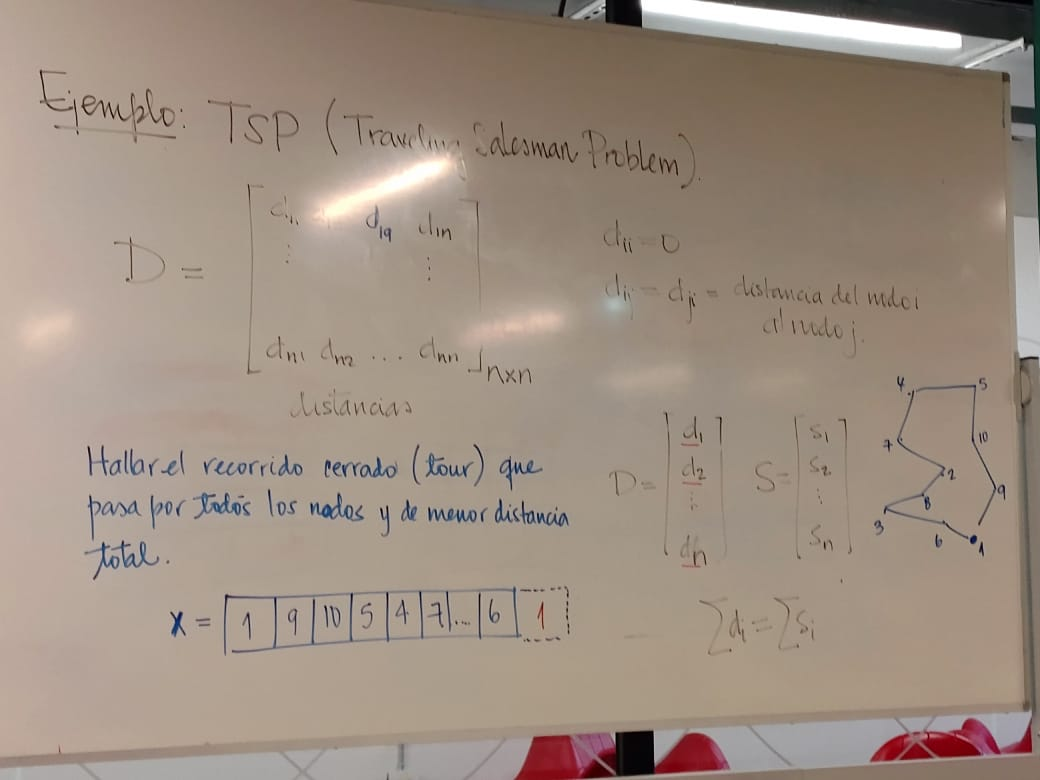

Vemos que esto es una permutacion que representa el recorrido de las ciudades.

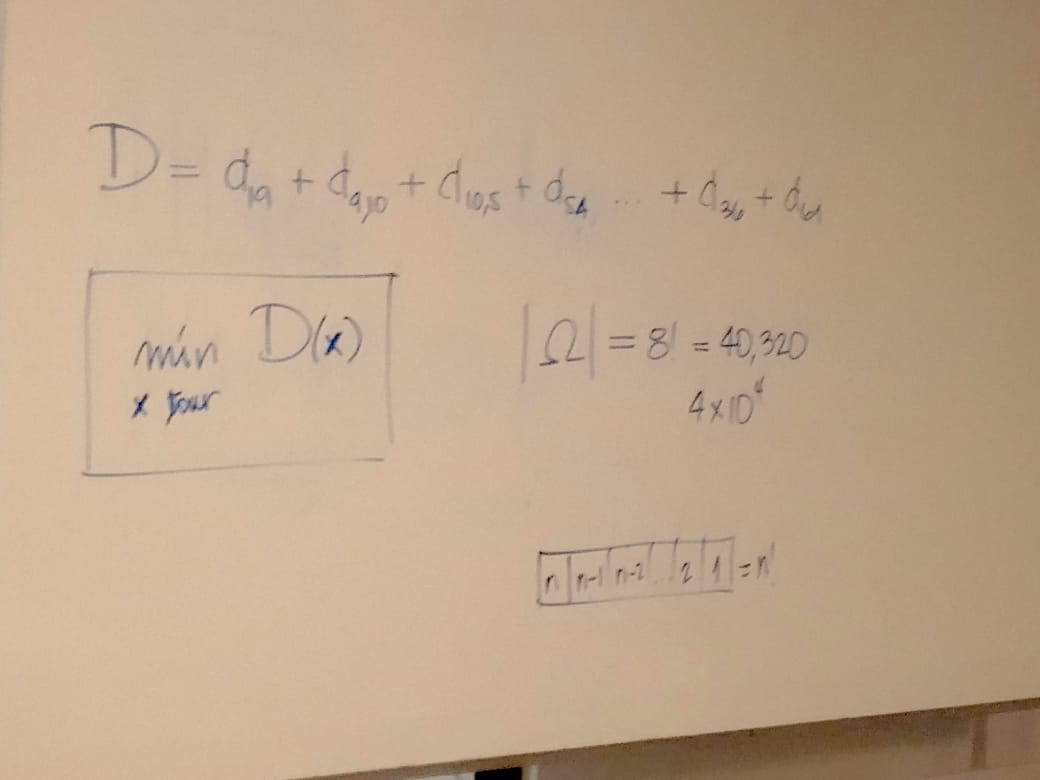




El espacio de busqueda entonces sera

de n el tam;o del vector seria

|Omh| = (n-1)! por referencia circular



## Limites de timempo

CUando hacemos soluciones una por una , hacemos busqueda exahustiva, por eso se definen periodos de tiempo porque no hay infinito tiempo



## Algoritmos Geneticos

Los **algoritmos genéticos (AG)** son una técnica de **optimización y búsqueda** inspirada en los principios de la **evolución biológica** (selección natural, cruzamiento y mutación). Se utilizan para resolver problemas complejos donde no es fácil aplicar métodos matemáticos exactos.

👉 Funcionan imitando la evolución:

1. **Representación (cromosomas):**
   Cada posible solución al problema se representa como un individuo (generalmente una cadena de números o bits).

2. **Población inicial:**
   Se genera un conjunto de soluciones candidatas al azar.

3. **Evaluación (función de aptitud):**
   Se mide qué tan buena es cada solución respecto al problema (fitness).

4. **Selección:**
   Se eligen los mejores individuos para reproducirse, simulando la “supervivencia del más apto”.

5. **Cruzamiento (crossover):**
   Se combinan partes de dos soluciones para generar nuevas.

6. **Mutación:**
   Se cambian aleatoriamente partes de una solución para mantener diversidad.

7. **Iteración:**
   Este ciclo se repite hasta que se encuentra una solución suficientemente buena o se alcanza un número máximo de generaciones.

📌 **Ejemplos de uso:**

* Optimización de rutas (tipo viajero vendedor).
* Diseño de redes neuronales.
* Ajuste de parámetros en modelos matemáticos.
* Problemas de ingeniería (estructuras, diseño de circuitos).


Lo que busca es si encuentra una estrategia optima siempre le ira a la segura la mayoria de las veces




### 🔹 ¿Qué es la función de *fitness*?

La **función de fitness** (también llamada función de aptitud) es la que **evalúa qué tan buena es una solución candidata** dentro de la población del algoritmo genético.

* Cada individuo de la población representa una posible solución.
* El **fitness** asigna un valor numérico que mide qué tan cerca está esa solución del objetivo.
* Cuanto mayor (o menor, según el problema) sea el fitness, mejor es la solución.

### 🔹 Ejemplo

Si quiero maximizar la función:

$$
f(x) = x^2
$$

* Los cromosomas son valores de $x$.
* El **fitness** de un individuo $x$ sería simplemente $f(x) = x^2$.
* El AG seleccionará preferentemente a los individuos con mayor fitness para reproducirse.

### 🔹 Rol en el algoritmo genético

1. **Inicialización**: generar población aleatoria.
2. **Evaluación**: calcular fitness de cada individuo.
3. **Selección**: elegir mejores individuos según fitness.
4. **Cruce y mutación**: generar nueva población.
5. **Iterar** hasta que se alcance un criterio de parada.


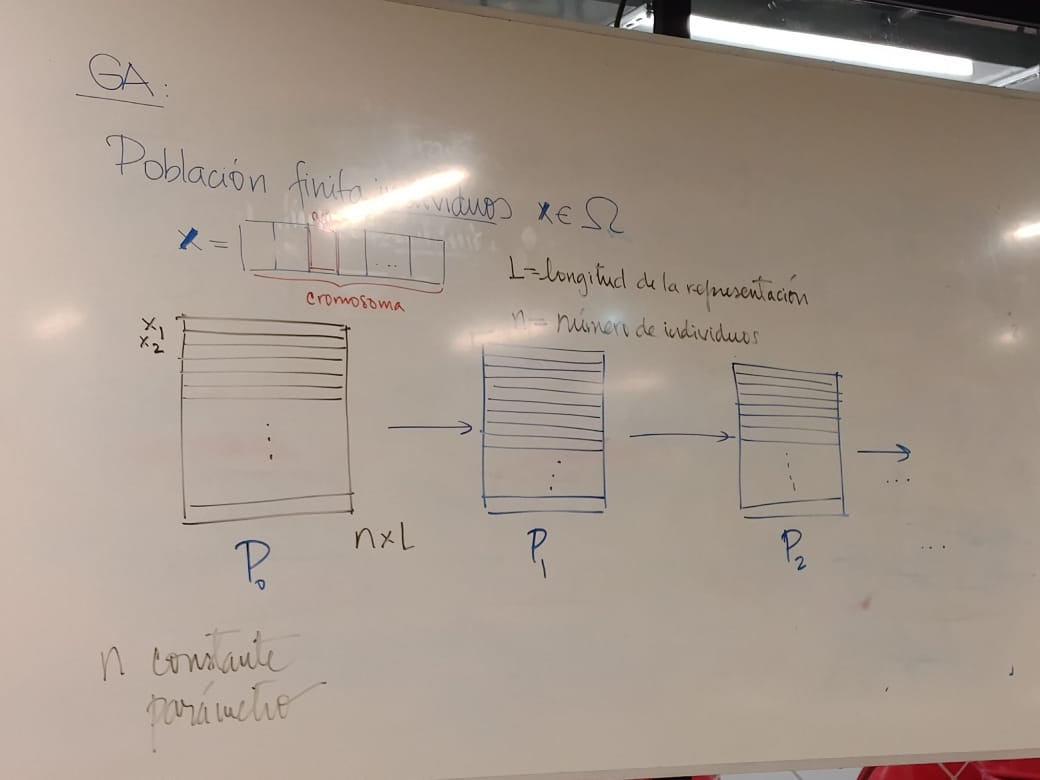


Vamos a de las tagblas rankear de los mas aptos a los menos aptos por n tablas de iteraciones que se tienen

Lo que podemos hacer es calcular el valor de todos los individuos y calcular el valor de la funcion



En algoritmo genetico lo que se quiere es mantener en algoritmos geneticos, si se pierde entonces pasan muchos problemas

